# Problema de Negócio

**All in One** é uma empresa fictícia de comércio eletrônico com sede no Reino Unido. Ela oferece uma ampla gama de produtos voltados para diversas categorias, incluindo decoração de casa, suprimentos para festas, acessórios de cozinha, soluções de armazenamento e muito mais.

Após vender com sucesso uma ampla variedade de produtos e acumular uma base substancial de clientes, a All in One reconhece o imenso valor oculto em seus dados de clientes. A empresa tem como objetivo aproveitar o poder da ciência de dados para obter **insights mais profundos** sobre sua base de clientes e aplicar esses insights de forma estratégica. Um de seus principais objetivos é **segmentar seus clientes** de forma eficaz. Essa segmentação permitirá à All in One compreender sua base de clientes em um nível mais detalhado, identificar grupos de clientes específicos com necessidades e preferências distintas, e adaptar seus esforços de marketing e ofertas de produtos de acordo.

Além disso, ao implementar um **programa de fidelidade**, a All in One busca cultivar relacionamentos mais fortes com os clientes e aumentar a retenção deles. Por meio da análise cuidadosa dos comportamentos dos clientes, padrões de compra e preferências, eles podem projetar um programa de fidelidade que ofereça incentivos personalizados, recompensas e benefícios exclusivos para diferentes segmentos de clientes. Essa abordagem personalizada não apenas promove a fidelidade do cliente, mas também cria um senso de apreço e pertencimento entre os clientes, fortalecendo ainda mais sua conexão com a marca.

# Dados

- **InvoiceNo**: Número da fatura, um identificador único para cada transação
- **StockCode**: Código do produto, um identificador único para cada produto
- **Description**: Descrição do produto
- **Quantity**: Quantidade de produtos comprados em cada transação
- **InvoiceDate**: Data e hora de cada transação
- **UnitPrice**: Preço unitário de cada produto
- **CustomerID**: ID do cliente, um identificador único para cada cliente
- **Country**: País do cliente

# Planejamento da Solução

## Entrada

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para participar de um Programa de Fidelidade.
2. Conjunto de Dados:
    - Dados de vendas de uma plataforma de comércio eletrônico online, cobrindo um período de um ano.



## Saída

1. Identificação das pessoas a serem parte do programa Insiders
    - Lista:

    - client_id is_insiders
    - 10323 sim/1
    - 32413 não/0
2. Relatório com respostas para perguntas de negócios:
    - Quem são as pessoas elegíveis para participar do programa Insiders?
    - Quantos clientes serão incluídos no grupo?
    - Quais são as características-chave desses clientes?
    - Qual é a porcentagem de contribuição de receita dos Insiders?

## Tarefa

1. Quem são as pessoas elegíveis para participar do programa Insiders?
    - O que significa ser elegível? Quem são os clientes de alto valor?
    - Receita:
        - Ticket médio alto.
        - Alto valor vitalício do cliente (LTV).
        - Baixa recência.
        - Tamanho do cesto alto.
        - Baixa probabilidade de churn - modelos.
        - Alta previsão de LTV - modelos.
        - Alta propensão de compra - modelos.
2. Custo:
    - Baixa taxa de retorno.

3. Quantos clientes serão incluídos no grupo? - Número total de clientes - % do grupo Insiders

4. Quais são as características-chave desses clientes? - Escreva características dos clientes: - Idade - Localização - Escreva características de consumo: - Atributos de cluster.

5. Qual é a porcentagem de contribuição de receita dos Insiders? - Receita total do ano - Receita total do grupo Insiders durante o ano.

# 0.0 IMPORTS

In [1]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
import inflection
import sweetviz as sv
import warnings
import re
import ydata_profiling as yd
import umap.umap_ as umap

from matplotlib import pyplot as plt
from plotly     import express    as px



from sklearn             import cluster       as c
from sklearn             import metrics       as mt
from sklearn             import preprocessing as pp
from sklearn             import decomposition as dd
from sklearn.manifold    import TSNE
from sklearn             import ensemble      as en
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.filterwarnings('ignore')

C:\Users\edils\anaconda3\envs\customer_fidelity\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\edils\anaconda3\envs\customer_fidelity\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\edils\anaconda3\envs\customer_fidelity\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://n

## 0.1 Helper Functions

In [2]:
palette = ["#00BFFF", "#DC143C", "#FFA07A", "#FFD700", "#8B008B", "#7CFC00", "#FF69B4", "#00CED1", "#FF6347", "#9400D3"]
def jupyter_settings(palette):
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 50
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set(font_scale=2)
    sns.set_theme(palette=palette)
    warnings.simplefilter("ignore")
    # plt.rcParams.update({'font.size': 10})
    sns.set_style("white")

    
jupyter_settings(palette)   

## 0.2 Loading Data

In [3]:
path = 'C:/Users/edils/repos/customer_fidelity/data/'

In [4]:
df_raw = pd.read_csv(path + 'ecommerce.csv', encoding='windows-1252')

In [5]:
df_raw = df_raw.drop('Unnamed: 8', axis=1)

In [6]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0 DATA DESCRIPTION

In [7]:
df1 = df_raw.copy()

In [8]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [9]:
# report = sv.analyze(df1)
# report.show_html()

## 1.1 Rename Columns

In [10]:
df1.columns = df1.columns.map(lambda x: inflection.underscore(x))

## 1.2 Data Dimensions

In [11]:
df1.shape

(541909, 8)

## 1.3 Data Types

In [12]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4 Check NA

In [13]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5 Replace NA

In [14]:
df_missing = df1.loc[pd.isnull(df1['customer_id']),:]

In [15]:
#create reference
df_backup = pd.DataFrame(df_missing['invoice_no'].drop_duplicates())
df_backup['customer_id'] = np.arange(19000, 19000+len(df_backup),1)

#merge
df1 = pd.merge(df1, df_backup, on='invoice_no', how='left')

#coalesce - combina o que tem NaN em uma coluna com o que não tem em outra
df1['customer_id'] = df1['customer_id_x'].combine_first(df1['customer_id_y'])

#drop extra columns
df1 = df1.drop(['customer_id_x','customer_id_y'], axis=1)

## 1.6 Change Types

In [16]:
#df1['customer_id'] = df1['customer_id'].astype('int64')

In [17]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

## 1.7 Descriptive Statistics

In [18]:
numerical_attributes = df1.select_dtypes(include=['float64', 'int64', 'datetime64[ns]'])
categorical_atributtes = df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])

## 1.7.1 Numerical Analysis

In [19]:
disp = numerical_attributes.agg(['mean','median','std','min','max',lambda x: max(x) - min(x), 'skew', 'kurtosis']).T.rename(columns={'<lambda>':'range'})

In [20]:
disp

,mean,median,std,min,max,range,skew,kurtosis
quantity,9.55225,3.0,218.081158,-80995.0,80995.0,161990.0,-0.264076,119769.160031
invoice_date,2017-07-02 00:00:13.073782016,2017-07-17 00:00:00,115 days 21:02:59.177457004,2016-11-29 00:00:00,2017-12-07 00:00:00,373 days 00:00:00,NaN,NaN
unit_price,4.611114,2.08,96.759853,-11062.06,38970.0,50032.06,186.506972,59005.719097
customer_id,16688.840453,16249.0,2911.411352,12346.0,22709.0,10363.0,0.487449,-0.804287


Podemos ver que existes dados grandes e negativos em 'quantity'e também produtos igual a 0.0 em unit_price

## 1.7.2 Categorical Atributtes

In [21]:
categorical_atributtes

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom
...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,France


In [22]:
#invoice_no
letter_lines = categorical_atributtes['invoice_no'].apply(lambda x: bool (re.search('[a-zA-Z]', x)))
letter_df = df1.loc[letter_lines,'quantity']
any(letter_df >0)

True

Todos os valores de invoice que começam com C tem valores de quantidade negativos, provavelmente são itens de devolução

In [23]:
#stock_code
stock_letter = categorical_atributtes['stock_code'].apply(lambda x: bool (re.search('^[a-zA-Z]+$', x)))
stock_df = df1.loc[stock_letter,:]

In [24]:
stock_df['stock_code'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

Na coluna stock_code temos vários itens com descrições diferentes que estão sujando o dataframe

In [25]:
#country - European Community and Unspecified
df1['country'].unique()
df1.loc[:,['customer_id','country']].drop_duplicates().groupby('country').count().reset_index().sort_values(by='customer_id', ascending=False)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


In [26]:
#remove description

# 2.0 VARIABLE FILTERING

In [27]:
df2 = df1.copy()

## 2.1 Numerical Attributes

In [28]:
#unit_price
df2 = df2.loc[df2['unit_price'] >= 0.040,:]

#stock code
df2 = df2.loc[~df2['stock_code'].isin(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK']),:]

#description
df2 = df2.drop('description', axis=1)

#country
df2 = df2.loc[~df2['country'].isin(['Unspecified','European Community']),:]

#bad users

df2 = df2.loc[~df2['customer_id'].isin([16446]),:]


Deixei apenas preços acima de 0. Letras do Stock code que poluem os dados. Description não ajuda na clusterização e Países da União europeia já são repetidos e Países Não especificados poluem os dados

In [29]:
#divide df in purchases and returns
df_purchase = df2.loc[df2['quantity'] >=0, :]
df_returns = df2.loc[df2['quantity'] < 0,:]

# 3.0 FEATURE ENGINEERING

In [30]:
df3 = df2.copy()

In [31]:
df3.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850.0


## 3.1 Monetary 

In [32]:
#Monetary - O quanto cada cliente gera de $
aux_monetary = pd.DataFrame()
aux_monetary['valor_bruto'] = df_purchase['quantity'] * df_purchase['unit_price']
aux_monetary['customer_id'] = df_purchase['customer_id']
df_ref = aux_monetary.loc[:,['valor_bruto', 'customer_id']].groupby('customer_id').sum().reset_index().rename(columns={'valor_bruto':'monetary'})
df_ref.isna().sum()

customer_id    0
monetary       0
dtype: int64

## 3.2 Qtd de Compras

In [33]:
#Quantos produtos cada cliente comprou
aux_invoice = df_purchase.loc[:,['invoice_no','customer_id']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'qtd_compras'})
df_ref = pd.merge(df_ref, aux_invoice, on='customer_id', how='left')
df_ref.isna().sum()

customer_id    0
monetary       0
qtd_compras    0
dtype: int64

## 3.4 Qtd produtos comprados

In [34]:
#Quantos produtos cada cliente comprou
aux_qtd = df_purchase.loc[:,['quantity','customer_id']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtd_items'})
df_ref = pd.merge(df_ref, aux_qtd, on='customer_id', how='left')
df_ref.isna().sum()

customer_id    0
monetary       0
qtd_compras    0
qtd_items      0
dtype: int64

## 3.5 Qtd produtos únicos dentro da compra (stock_code)

In [35]:
#Quantos produtos cada cliente comprou
aux_qtd_stock = df_purchase.loc[:,['stock_code','customer_id']].groupby('customer_id').count().reset_index().rename(columns={'stock_code':'qtd_prods'})
df_ref = pd.merge(df_ref, aux_qtd_stock, on='customer_id', how='left')
df_ref.isna().sum()

customer_id    0
monetary       0
qtd_compras    0
qtd_items      0
qtd_prods      0
dtype: int64

## 3.6 Recency

In [36]:
#Recency
aux_recency = df_purchase.loc[:,['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
date_max = df_purchase['invoice_date'].max()
aux_recency['recency'] = (date_max - aux_recency['invoice_date']).dt.days
df_ref = pd.merge(df_ref, aux_recency, on='customer_id', how='left')
df_ref = df_ref.drop(['invoice_date'],axis=1)
df_ref.isna().sum()

customer_id    0
monetary       0
qtd_compras    0
qtd_items      0
qtd_prods      0
recency        0
dtype: int64

## 3.7 Average Ticket

In [37]:
#Ticket Médio
aux_ticket = aux_monetary.loc[:,['valor_bruto', 'customer_id']].groupby('customer_id').mean().reset_index().rename(columns={'valor_bruto':'avg_ticket'})
df_ref = pd.merge(df_ref, aux_ticket, on='customer_id', how='left') 
df_ref.isna().sum()

customer_id    0
monetary       0
qtd_compras    0
qtd_items      0
qtd_prods      0
recency        0
avg_ticket     0
dtype: int64

## 3.8 Average Recency Days

In [38]:
aux_rd = df3.loc[:,['invoice_date','customer_id']].drop_duplicates().sort_values(by=['customer_id','invoice_date'])
aux_rd['previous_customer'] = aux_rd['customer_id'].shift() #next customer
aux_rd['previous_invoice'] = aux_rd['invoice_date'].shift() #next date
aux_rd['avg_recency_days'] = aux_rd.apply(lambda x: (x['invoice_date'] - x['previous_invoice']).days if x['previous_customer'] == x['customer_id'] else np.nan, axis=1)
aux_rd = aux_rd.dropna()

#drop support columns
aux_rd = aux_rd.drop(['invoice_date','previous_customer','previous_invoice'], axis=1)

#calculate avg recency
aux_rd_avg = aux_rd.groupby('customer_id').mean().reset_index()

#merge
df_ref = pd.merge(df_ref, aux_rd_avg, on='customer_id', how='left')


In [39]:
df_ref.isna().sum()

customer_id            0
monetary               0
qtd_compras            0
qtd_items              0
qtd_prods              0
recency                0
avg_ticket             0
avg_recency_days    2727
dtype: int64

## 3.9 Frenquency Purchase

In [40]:
df_freq = (df_purchase[['customer_id','invoice_no', 'invoice_date']].drop_duplicates().groupby('customer_id')
                                                           .agg(days = ('invoice_date', lambda x: (max(x) - min(x)).days + 1),
                                                                buy_ = ('invoice_no', 'count'))).reset_index()

#Frequency
df_freq['frequency'] = df_freq.apply(lambda x: x['buy_'] / x['days'] if x['days'] != 0 else 0, axis=1) 

#merge
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref = df_ref.drop(['days','buy_'],axis=1)

In [41]:
df_ref.isna().sum()

customer_id            0
monetary               0
qtd_compras            0
qtd_items              0
qtd_prods              0
recency                0
avg_ticket             0
avg_recency_days    2727
frequency              0
dtype: int64

## 3.10 Devoluções

In [42]:
qtd_returns = df_returns.loc[:,['customer_id','quantity']].groupby('customer_id').sum().reset_index().rename(columns={'quantity':'qtd_returns'})
qtd_returns['qtd_returns'] = qtd_returns['qtd_returns']*-1

#merge
df_ref = pd.merge(df_ref, qtd_returns, on='customer_id', how='left')

#Os NaNs gerados são pessoas que não devolveram
df_ref.loc[df_ref['qtd_returns'].isna(),'qtd_returns'] = 0

In [43]:
df_ref.isna().sum()

customer_id            0
monetary               0
qtd_compras            0
qtd_items              0
qtd_prods              0
recency                0
avg_ticket             0
avg_recency_days    2727
frequency              0
qtd_returns            0
dtype: int64

## 3.11 Unique Basket Size

In [44]:
#qtd de produtos diferentes dentro de uma compora
basket_size = df_purchase.loc[:,['customer_id','stock_code','invoice_no']].groupby(['customer_id']).nunique().reset_index()

#media itens por compra
basket_size['unique_avg_basket'] = basket_size['stock_code'] / basket_size['invoice_no']

#merge
df_ref = pd.merge(df_ref, basket_size[['customer_id','unique_avg_basket']], on='customer_id', how='left')

In [45]:
df_ref.isna().sum()

customer_id             0
monetary                0
qtd_compras             0
qtd_items               0
qtd_prods               0
recency                 0
avg_ticket              0
avg_recency_days     2727
frequency               0
qtd_returns             0
unique_avg_basket       0
dtype: int64

## 3.12 Quantity Basket Size - Quantidade de produtos por basket

In [46]:
#qtd de produtos medios por compra
qtd_basket_size = (df_purchase.loc[:,['customer_id','quantity','invoice_no']].groupby(['customer_id'])
                                                                            .agg(uniq_prod = ('invoice_no', 'nunique'),
                                                                                 quantity_sum = ('quantity', 'sum'))).reset_index()    

#media de quantidade de itens por basket
qtd_basket_size['avg_basket'] = qtd_basket_size['quantity_sum'] / qtd_basket_size['uniq_prod']

#merge
df_ref = pd.merge(df_ref, qtd_basket_size[['customer_id','avg_basket']], on='customer_id',how='left')

In [47]:
df_ref.isna().sum()

customer_id             0
monetary                0
qtd_compras             0
qtd_items               0
qtd_prods               0
recency                 0
avg_ticket              0
avg_recency_days     2727
frequency               0
qtd_returns             0
unique_avg_basket       0
avg_basket              0
dtype: int64

## 3.13 Check Final Result

In [48]:
df_ref.head()

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket
0,12346.0,77183.60,1,74215,1,325,77183.600000,NaN,1.000000,74215.0,1.000000,74215.000000
1,12347.0,4310.00,7,2458,182,2,23.681319,60.833333,0.019126,0.0,14.714286,351.142857
2,12348.0,1437.24,4,2332,27,75,53.231111,94.333333,0.014085,0.0,5.250000,583.000000
3,12349.0,1457.55,1,630,72,18,20.243750,NaN,1.000000,0.0,72.000000,630.000000
4,12350.0,294.40,1,196,16,310,18.400000,NaN,1.000000,0.0,16.000000,196.000000


# 4.0 EDA (EXPLORATORY DATA ANALYSIS

In [49]:
df4 = df_ref.dropna().copy()
df4.isna().sum()

customer_id          0
monetary             0
qtd_compras          0
qtd_items            0
qtd_prods            0
recency              0
avg_ticket           0
avg_recency_days     0
frequency            0
qtd_returns          0
unique_avg_basket    0
avg_basket           0
dtype: int64

## 4.1 Unilateral Analysis

**Notes**

1. Clusters Coesos - Separados
2. Métricas
    - Min, Máx, Range (Dispersão).
    - Média, Mediana.
    - Desvio Padrão e Variância.
    - Coeficiente de Variação (desvio padrão/media). -> quanto menor mais próximos estão os dados(mais perto da média).
    - Distribuição

**Notes**



In [50]:
#Pandas Profiling

profile = yd.ProfileReport(df4)
profile.to_file('outputv2.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 42.13it/s]


### 4.1.1 Monetary

In [51]:
#analisando outliers
df4[df4['customer_id'] == 14646]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket
1686,14646.0,279138.02,72,196844,2060,1,135.503893,7.844444,0.20339,288.0,9.708333,2733.944444


### 4.1.2 Qtd Produtos

In [52]:
df4[df4['qtd_prods'] == 7838]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket
4002,17841.0,40967.72,124,23053,7838,1,5.226808,3.321429,0.33244,203.0,10.66129,185.91129


### 4.1.3 Avg Ticket

In [53]:
df4[df4['avg_ticket'] == 56157.5]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket


In [54]:
# df3[df3['customer_id'] == 16446]

Nesse caso o cliente devolveu quase todos os itens que comprou -> Remover

### 4.1.4 Frequency

In [55]:
df4[df4['frequency'] == 17]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket
4007,17850.0,5391.21,34,1733,297,372,18.152222,35.5,17.0,40.0,0.617647,50.970588


In [56]:
df3.loc[df3['customer_id'] == 17850,:].head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850.0
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850.0
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850.0
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850.0
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850.0


### 4.1.5 Avg Basket Size

In [57]:
df4[df4['avg_basket'] == 40498.5]

,customer_id,monetary,qtd_compras,qtd_items,qtd_prods,recency,avg_ticket,avg_recency_days,frequency,qtd_returns,unique_avg_basket,avg_basket


## 4.2 Bivariate Analysis

In [58]:
df_bi = df4.drop('customer_id', axis=1)

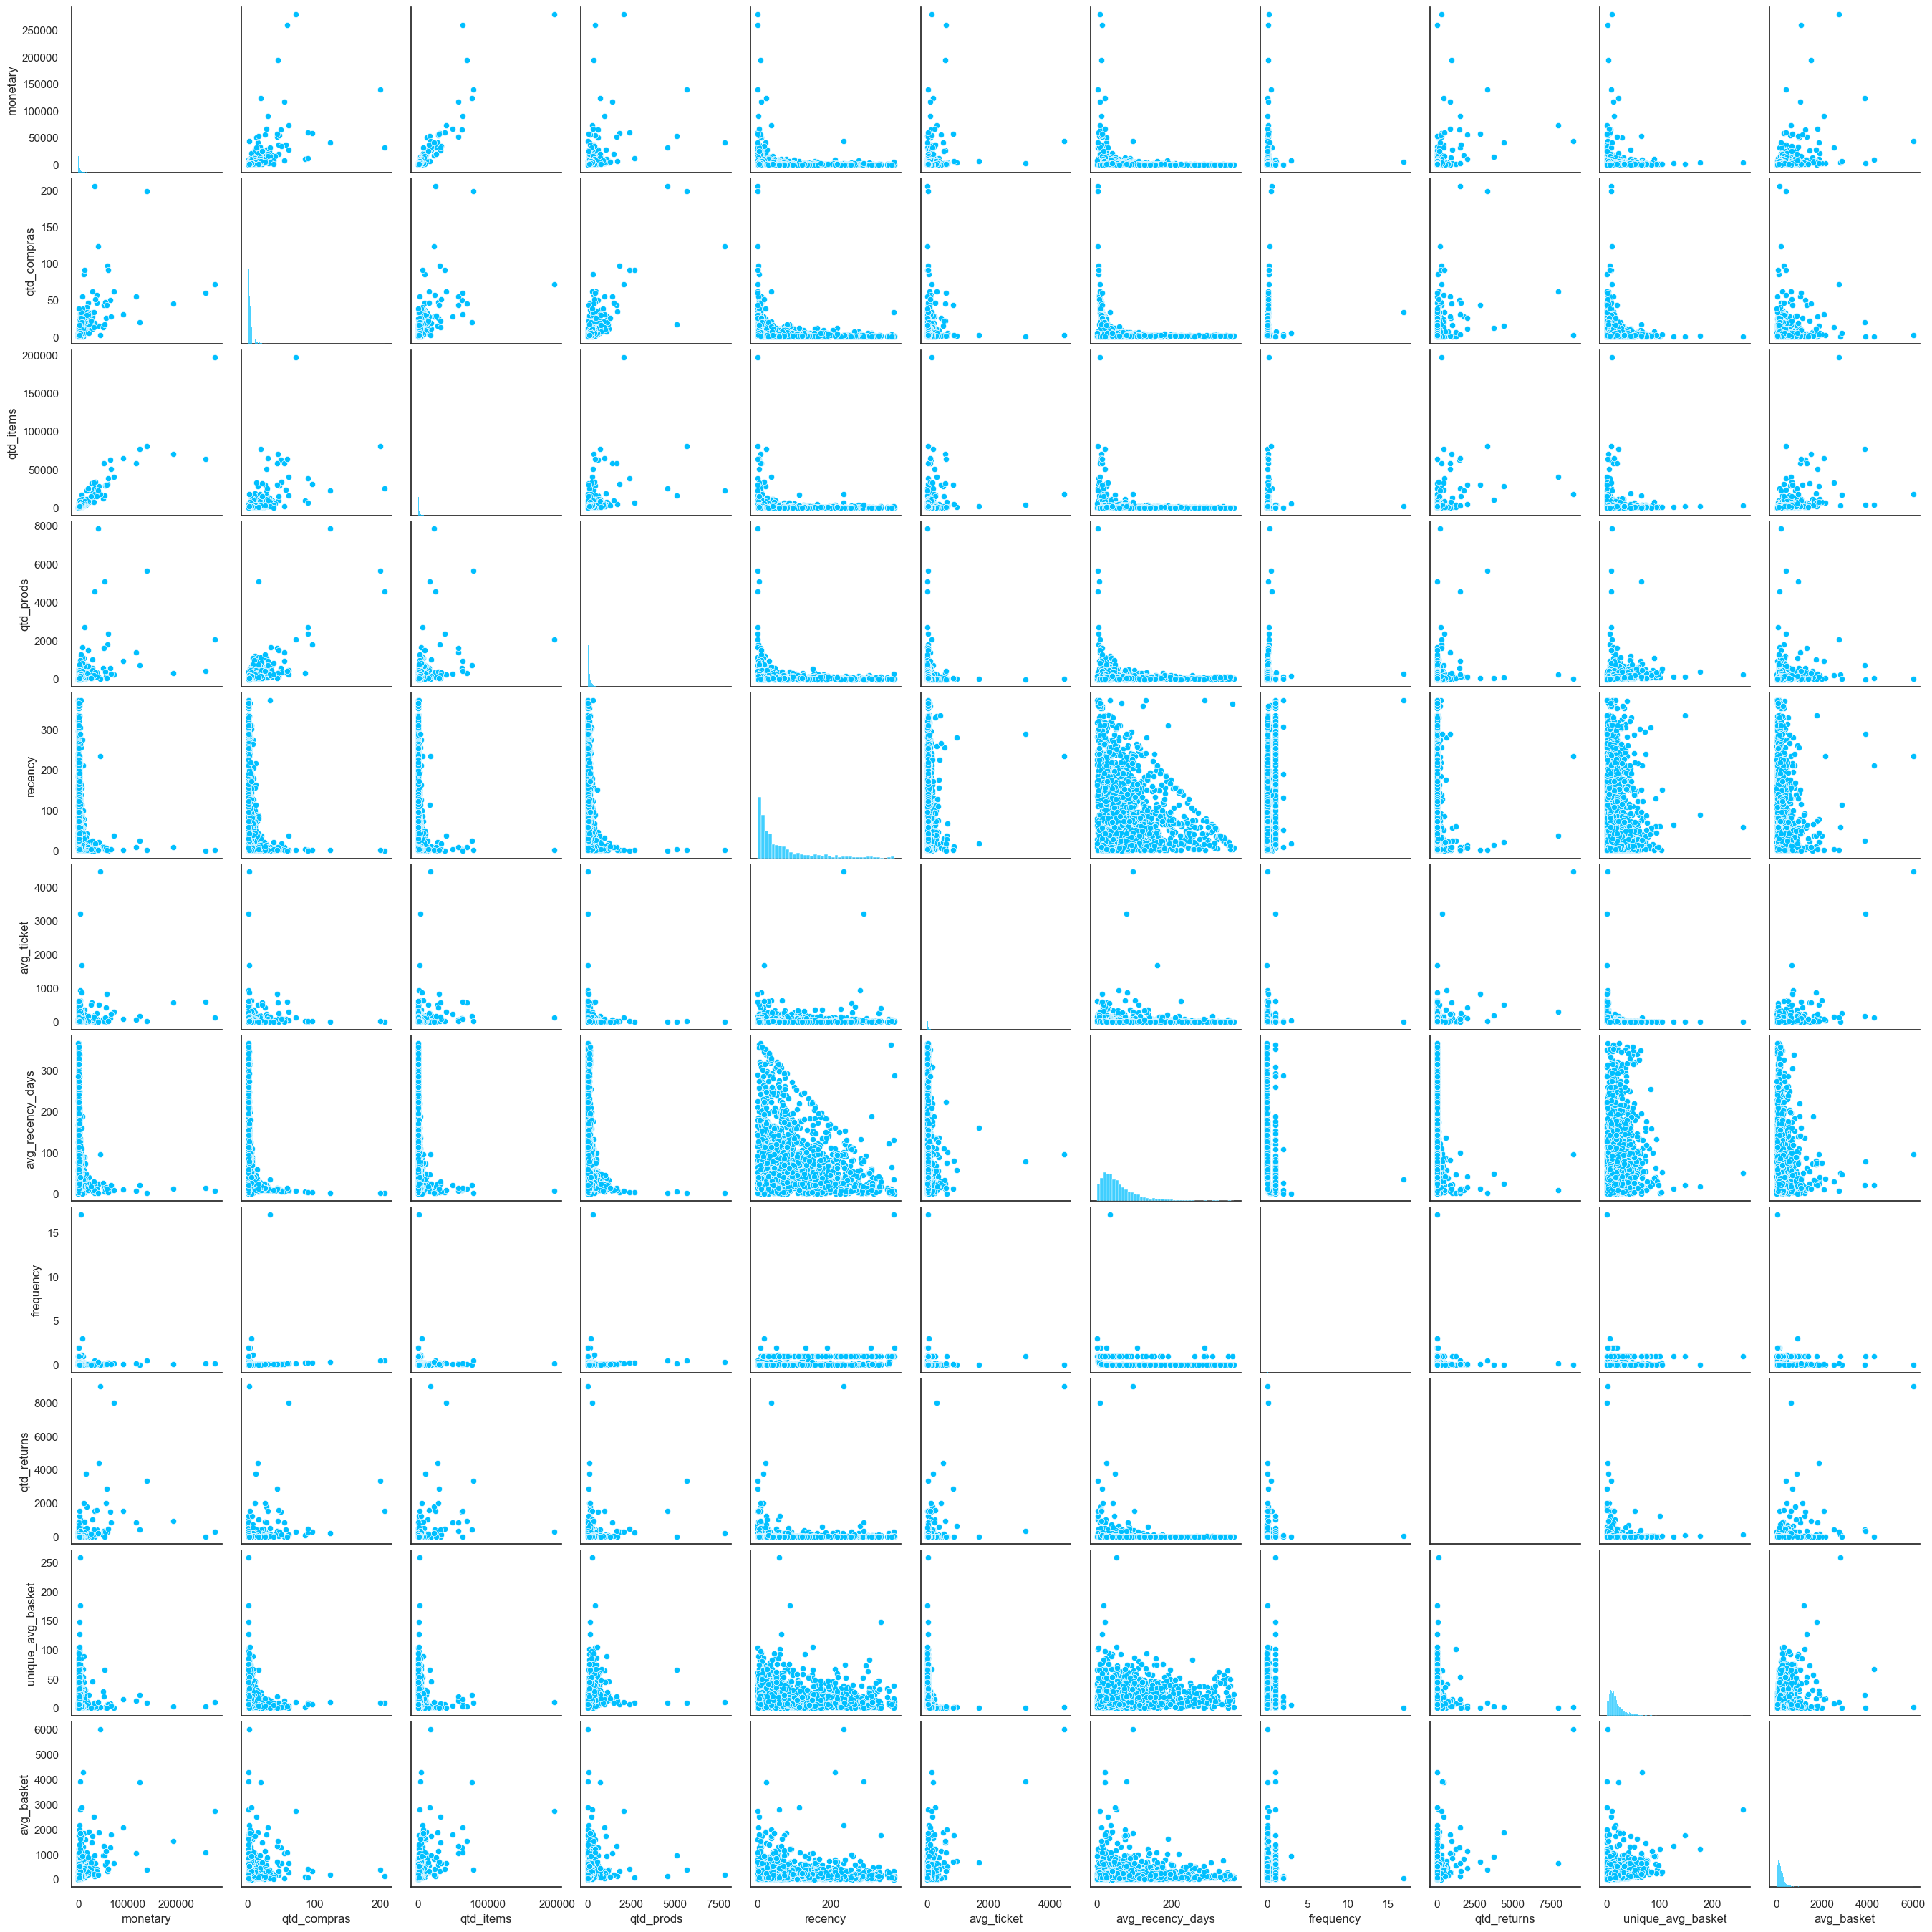

In [59]:
sns.pairplot(df_bi)

Estamos buscando variáveis com bastante variação. No caso da Frequency por exemplo, provavelmente não é uma variável que impactará o modelo pois em relação às outras ela praticamente não muda.

Candidatas a remoção -> frequency, avg_ticket


## 4.3 Embedding

In [60]:
df43 = df4.drop(['customer_id'], axis=1).copy()

In [61]:
#Transform
mms = pp.MinMaxScaler()
transf_list = df43.columns

for i in transf_list:
    df43[i] = mms.fit_transform(df43[i].values.reshape(-1,1))
    
X = df43.copy()    

## 4.3.1 PCA

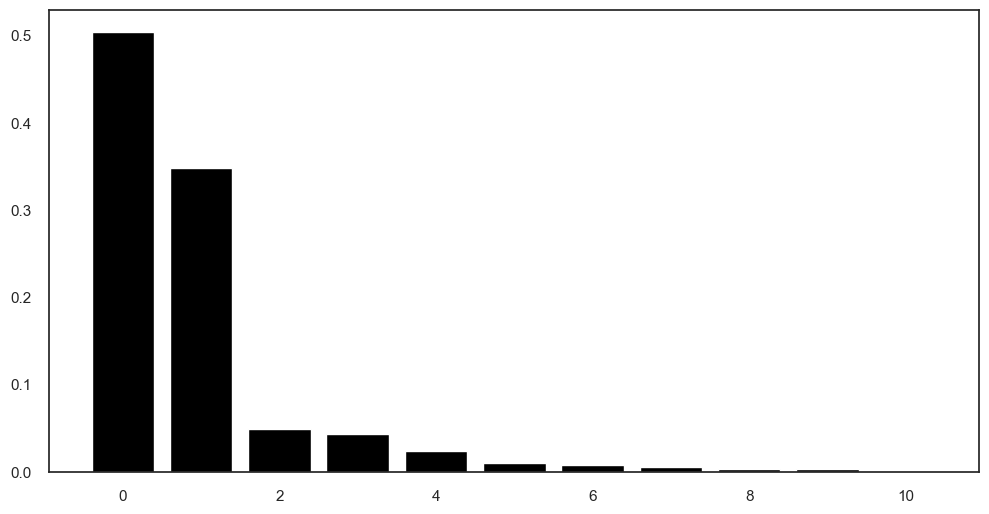

In [62]:
pca = dd.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

#plot explained variable
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')

#pca component
df_pca = pd.DataFrame(principal_components)

Como estamos procurando varáveis com muita variação, optei por reduzir o espaço para as 2 variáveis que tem a maior variância segundo o PCA para ver se forma alguns clusters

<Axes: xlabel='0', ylabel='1'>

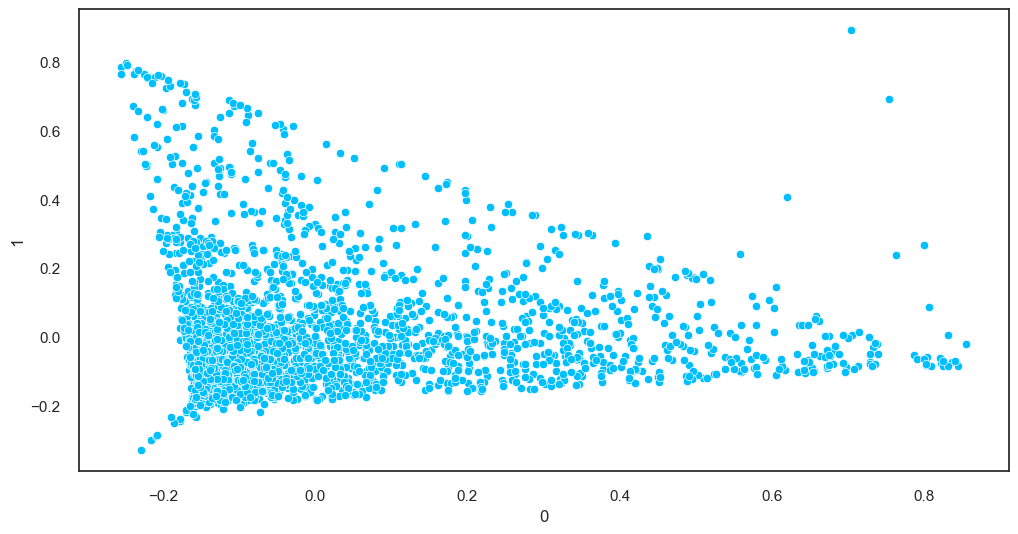

In [63]:
sns.scatterplot(x=0, y=1, data=df_pca)

PCA não deu muito certo, mostrando um espaço ainda bagunçado

## 4.3.2 U-MAP

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

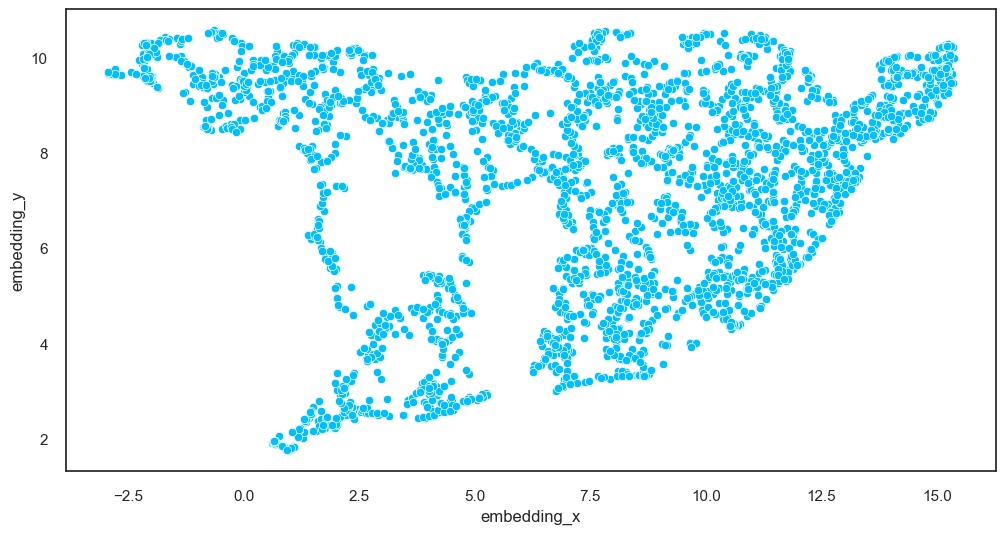

In [64]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_pca)

UMAP deu um espaço pouca coisa melhor que o PCA mas ainda sim bem aleatório

## 4.3.3 t-SNE

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

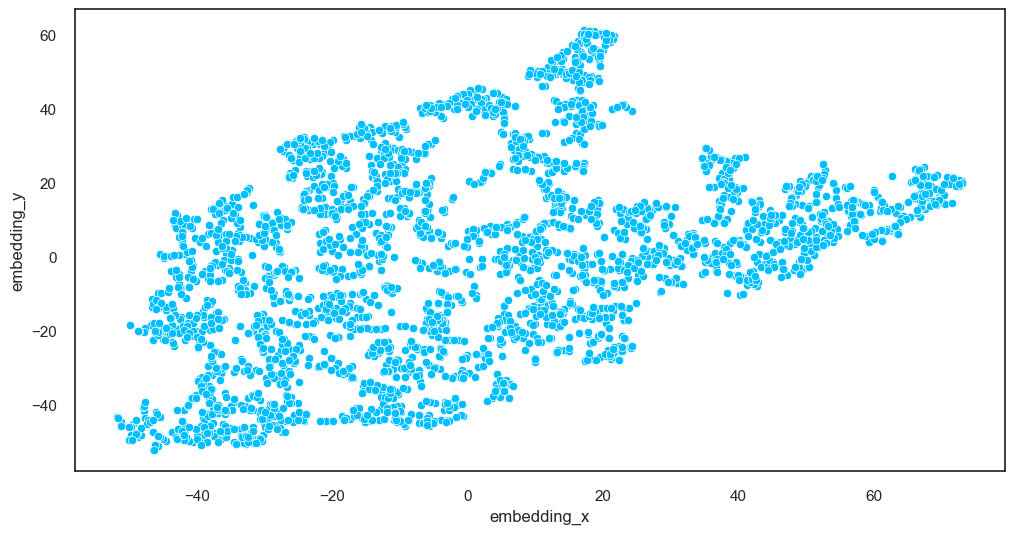

In [65]:
reducer = TSNE(n_components=2, random_state=42, n_jobs=-1)
embedding = reducer.fit_transform(X)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_pca)

Assim como o UMAP, não conseguiu organizar os dados

## 4.3.4 Tree-Based Embedding

In [66]:
X = df4.drop(['customer_id','monetary'], axis=1).copy()
y = df4['monetary'].copy()

In [67]:
#model definition
rf = en.RandomForestRegressor(random_state=42)

rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [68]:
#create leafs
df_leafs = pd.DataFrame(rf.apply(X))

In [69]:
df_leafs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,3340,3401,3330,3324,3296,3524,3339,3309,3439,3357,3346,3205,3212,3430,3241,3276,3334,3215,3283,3111,3153,3295,3351,3273,3352,3298,3205,3353,3218,3375,3262,3193,3221,3288,3343,3310,3359,3239,3269,3091,3411,3248,3329,3281,3311,3218,3276,3395,3380,3369,3264,3301,3289,3335,3284,3339,3377,3393,3232,3357,3266,3286,3315,3286,3349,3377,3274,3252,3330,3248,3336,3242,3345,3283,3371,3424,3287,3269,3351,3317,3293,3284,3296,3144,3259,3362,3218,3321,3192,3270,3262,3229,3377,3344,3350,3341,3121,3318,3300,3314
1,3298,3002,3272,3339,3205,3161,3307,3275,3393,3330,3160,3126,3170,3258,3245,3139,3300,3108,3204,3225,3131,3059,3334,3139,3306,3065,2993,3203,3236,3228,3018,3198,3201,3495,3364,3322,3368,3024,3235,3099,3045,3504,3216,3290,3346,3075,3114,3432,3292,3307,3075,3189,3303,3284,3216,3325,3245,3417,3081,3120,3294,3070,3304,3237,3309,3160,3029,3004,3192,3203,3283,3367,3174,3229,3208,3372,3183,3128,3390,3272,2949,3260,3271,3093,2990,3336,3331,3149,3007,3308,3218,3165,2999,3287,2822,3299,2712,3260,3342,3356
2,2295,2141,2183,2188,1861,2131,2160,2118,2046,2203,2104,1769,2027,1917,2195,2193,2135,2291,1916,1703,2129,2175,2061,1562,2167,1739,2104,1888,2187,2239,2109,2229,1564,2053,2263,1353,2391,2103,1731,1795,2259,1837,1773,1796,2080,2204,2147,1608,1841,2007,1988,1844,2060,1762,1569,1760,1922,1832,2235,1754,1821,2403,1987,2355,1823,2237,2197,2156,2037,2021,2249,2211,1956,1628,1862,2272,2128,2152,1962,1880,2075,1984,1981,2317,1797,1923,2269,2294,2126,2166,1846,1866,2195,1586,2190,2099,1654,2108,2219,1909
3,2740,3034,2881,3150,2678,2664,2608,2515,3028,3086,2855,2782,2855,2928,2651,2548,2921,2602,2850,2558,2513,2636,2445,2862,2882,2478,2578,3010,2709,2943,2601,2676,2948,2905,2954,2548,2999,2781,2809,2805,2607,2964,3088,2858,2508,2696,2955,2839,3086,2929,2647,2994,2495,2962,2673,2563,2784,2728,2610,2609,2848,2688,2835,2589,3154,2886,2837,2619,2733,2734,2702,2914,2975,2565,2899,2618,2567,2962,2983,2908,2508,2463,2790,2781,2751,2824,2621,2711,2801,2491,2612,2733,2563,2628,2868,2525,2741,2719,3117,3071
4,852,1056,464,786,399,1244,1430,441,740,777,794,822,737,765,581,792,1225,921,827,1151,802,1196,744,623,1183,1135,562,1131,413,459,1099,849,1111,1063,1342,944,1151,1229,692,933,1212,729,874,579,1185,337,1207,1059,885,748,433,860,765,1246,839,1227,1183,1172,957,1133,1014,433,1026,334,993,1119,1147,381,944,938,881,364,1191,1129,1052,719,1224,853,1190,763,956,1161,842,394,600,1162,799,366,669,1269,750,453,900,411,866,697,574,1054,787,358


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

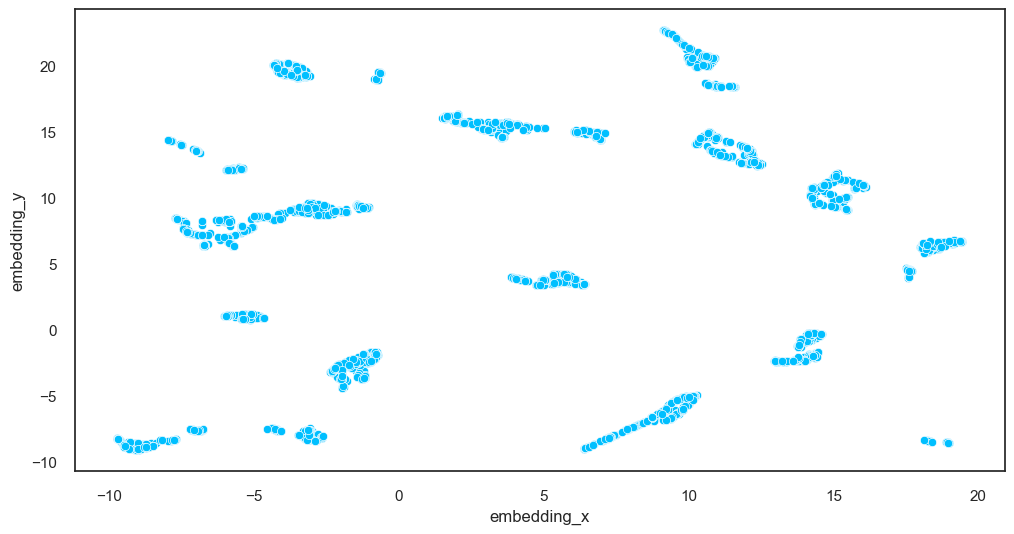

In [70]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_leafs)

#embedding
df_pca['embedding_x'] = embedding[:,0]
df_pca['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', 
                y='embedding_y',
                data=df_pca)

A redução de dimensionalidade pela RandomForest deu um resultado muito melhor, podendo ser observados vários clusters espaçados na imagem acima.

# 5.0 DATA PREPARATION

In [71]:
df5 = df4.copy()

In [72]:
mms = pp.MinMaxScaler()
ss = pp.StandardScaler()

#Transform
transf_list = df5.drop('customer_id', axis=1).columns

for i in transf_list:
    df5[i] = mms.fit_transform(df5[i].values.reshape(-1,1))    

# 6.0 FEATURE SELECTION

In [178]:
df6 = df5.copy()

# 7.0 HYPERPARAMETER FINE TUNNING(Find Clusters)

In [179]:
X = df6.drop('customer_id', axis=1)

In [ ]:
clusters = np.arange(1,11,1)

In [ ]:
clusters

## 7.1 Within-Cluster Sum of Square(WSS)

In [ ]:
wss = []

for k in clusters:
    #model definition
    kmeans = c.KMeans(n_clusters=k)
    
    #model training
    kmeans.fit(X)
    
    #validation
    wss.append(kmeans.inertia_)

#plot wws - Elbow Method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('WSS')
plt.title('WSS vs K')

## 7.2 Silhouette vs Elbow Analysis

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

In [ ]:
clusters = np.arange(2,11,1)

In [ ]:
clusters = np.arange(2,10,1)
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False, metric='silhouette')
kmeans.fit(X)
kmeans.show();

Com a Criação de novas features, a silhouette score já deu um valor alto para 4-5 clusters, que anteriormente eram 3. Então seguirei usando 5 clusters nesse ciclo

## 7.3 Silhouette Analysis

In [ ]:
clusters = np.arange(2,8,1)
fig, ax = plt.subplots(3,2, figsize=(20,15))

for k in clusters:
    kmeans = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    q, mod = divmod(k,2)
    
    visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()

# 8.0 MODEL TRAINING

## 8.1 K-Means

In [ ]:
k = 5
#definition
kmeans = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)

#training
kmeans.fit(X)

#clusters
labels = kmeans.labels_

In [ ]:
#WSS
print(f'WSS Score: {kmeans.inertia_:.3f}')

print(f'SS Score: {mt.silhouette_score(X, labels):.3f}')

# 9.0 CLUSTER ANALYSIS

In [ ]:
df9 = df6.copy()
df9['clusters'] = labels

In [ ]:
df9.head()

## 9.1 Visualize Inspection

In [ ]:
#px.scatter_3d(df9, x='monetary', y='recency', z='frequency', color=labels)

## 9.2 Silhouette Visualizer

In [ ]:
visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 9.3 2D Plot

In [ ]:
df_viz = df9.drop('customer_id', axis=1)
sns.pairplot(df_viz, hue='clusters')

## 9.4 UMAP - t-SNE

In [ ]:
reducer = umap.UMAP(n_neighbors=70, random_state=42)
embedding = reducer.fit_transform(X)

#embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

#plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='clusters',
                palette=sns.color_palette('hls', n_colors=len(df_viz['clusters'].unique())),
                data=df_viz)

Os Clusters estarem perto um dos outros nessa figura é um bom sinal, porque significa que na alta dimensionalidade eles tem a probabilidade de estarem próximos

## 9.5 Cluster Profile

In [ ]:
#Per Monetary
df_monetary = df9.loc[:,['clusters','monetary']].groupby('clusters').mean().reset_index()

#Per Frequency
df_frequency = df9.loc[:,['clusters','frequency']].groupby('clusters').mean().reset_index()

#Per Recency
df_recency = df9.loc[:,['clusters','recency']].groupby('clusters').mean().reset_index()

#Per Pencentual
df_client_perc = df9.loc[:,['customer_id','clusters']].groupby('clusters').count().reset_index()
df_client_perc['customer_id'] = df_client_perc['customer_id'].apply(lambda x: 100*(x)/(df_client_perc['customer_id'].sum()))
df_client_perc = df_client_perc.rename(columns={'customer_id':'percent'})

#Per Ticket
df_ticket = df9.loc[:,['clusters','ticket_medio']].groupby('clusters').mean().reset_index()

df_resume = pd.merge(df_monetary, df_frequency, on='clusters', how='left').merge(df_recency, on='clusters', how='left').merge(df_client_perc, on='clusters', how='left').merge(df_ticket, on='clusters', how='left')


In [ ]:
df_resume

Cluster 0 - Clientes Esporádicos
    - Clientes que comprar pouco, valor baixo, e com uma média de 3 meses. Porém engloba 99% dos clientes
    
Cluster 1 - Clientes Medianos
    - Clientes que compram em média uma vez por mês mas uma quantia maior e um valor maior que os Esporádicos
    
Cluster 2 - Clientes elegíveis a Insiders
    - Gastam muito, toda semana e compram bastante produtos

# 10.0 DEPLOY 